## Grafici: Come visualizzare dati in `Pandas`

E' possibile visualizzare il contenuto di una serie o di un DataFrame tramite la libreria `matplotlib`
![grafici](img/04_plot_overview1.svg)  
Questa volta usiamo come dataset un file .csv contenente dati relativi alla qualità dell'aria, in particolare concentrazioni di biossido di Azoto NO<sub>2</sub> per Londra, Parigi e Anversa.

In [73]:
import pandas as pd
import matplotlib.pyplot as plt

In [74]:
df = pd.read_csv('esempi/dataset/air_quality.csv',\
                 index_col=0, parse_dates=True)
df.head()

,station_antwerp,station_paris,station_london
datetime,,,
2019-05-07 02:00:00,NaN,NaN,23.0
2019-05-07 03:00:00,50.5,25.0,19.0
2019-05-07 04:00:00,45.0,27.7,19.0
2019-05-07 05:00:00,NaN,50.4,16.0
2019-05-07 06:00:00,NaN,61.9,NaN


>**NOTA** Abbiamo passato due nuovi parametri alla funzione `read_csv()`, questi sono:
>
>- `index_col` serve a definire una colonna come indice del DataFrame
>- `parse_dates` converte le date della colonna 0 in oggetti `Timestamp`

In [75]:
#Rinomino le colonne 
# columns è un attributo del dataframe
df.columns = ['Anversa', 'Parigi', 'Londra']
df

,Anversa,Parigi,Londra
datetime,,,
2019-05-07 02:00:00,NaN,NaN,23.0
2019-05-07 03:00:00,50.5,25.0,19.0
2019-05-07 04:00:00,45.0,27.7,19.0
2019-05-07 05:00:00,NaN,50.4,16.0
2019-05-07 06:00:00,NaN,61.9,NaN
...,...,...,...
2019-06-20 22:00:00,NaN,21.4,NaN
2019-06-20 23:00:00,NaN,24.9,NaN
2019-06-21 00:00:00,NaN,26.5,NaN


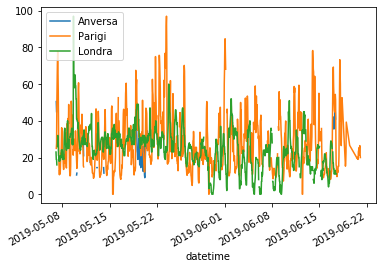

In [76]:
df.plot() # rapida visualizzazione dei dati

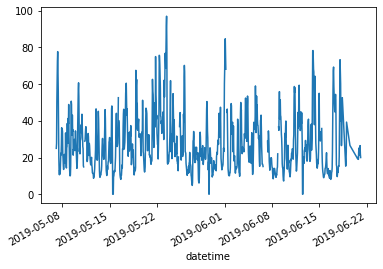

In [77]:
df["Parigi"].plot() # dati di una sola colonna (Parigi)

Oltre alle linee esistono diversi tipi di plot(vedi [documentazione](https://pandas.pydata.org/docs/user_guide/visualization.html#visualization-other)), per vedere quali abbiamo a disposizione usiamo un piccolo _trick_ :

In [78]:
#df.plot. +TAB

Per _graficare_ ogni colonna in un plot separato:

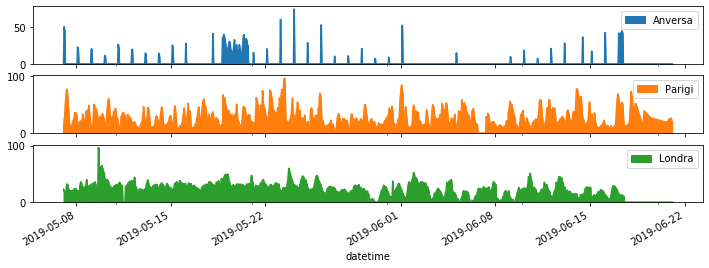

In [79]:
axs = df.plot.area(figsize=(12, 4), subplots=True)

Come si era visto nell'introduzione a `matplotlib`, anche in `Pandas` è possibile personalizzare ulteriormente i grafici con le stesse tecniche.  
Per esempio:

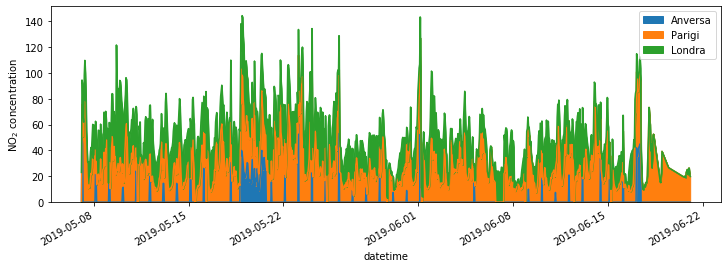

In [80]:
fig, axs = plt.subplots(figsize=(12, 4)); # imposto una Figure con  Axes
df.plot.area(ax=axs); # Visualizzo i dati in Axes
axs.set_ylabel("NO$_2$ concentration"); # imposto la Y label
fig.savefig("no2_concentrations.png") # salvo il tutto in un file PNG

Il metodo `savefig()` consente di esportare in diversi formati la figura realizzata.

Per una lista completa di tutti i [metodi di visualizzazione](https://pandas.pydata.org/pandas-docs/stable/user_guide/visualization.html)

***

## Inserire nuove colonne operando sulle esistenti
![ins_col](img/05_newcolumn_1.svg)

Se per esempio volessimo vedere il rapporto tra Parigi ed Anversa e salvare il risultato in una nuova colonna:

In [81]:
df['ratio_parigi_anversa'] = df['Parigi'] / df['Anversa']
df

,Anversa,Parigi,Londra,ratio_parigi_anversa
datetime,,,,
2019-05-07 02:00:00,NaN,NaN,23.0,NaN
2019-05-07 03:00:00,50.5,25.0,19.0,0.495050
2019-05-07 04:00:00,45.0,27.7,19.0,0.615556
2019-05-07 05:00:00,NaN,50.4,16.0,NaN
2019-05-07 06:00:00,NaN,61.9,NaN,NaN
...,...,...,...,...
2019-06-20 22:00:00,NaN,21.4,NaN,NaN
2019-06-20 23:00:00,NaN,24.9,NaN,NaN
2019-06-21 00:00:00,NaN,26.5,NaN,NaN


>**NOTA**
>Il calcolo viene eseguito elemento per elemento sulle colonne.

***

## Statistiche di base sui DataFrame

In [82]:
df['Parigi'].mean() #esegue la media

27.740537848605534

In [83]:
df[['Anversa','Parigi']].median()

Anversa    23.00
Parigi     24.15
dtype: float64

In [84]:
df[['Anversa','Parigi']].describe()

,Anversa,Parigi
count,95.000000,1004.000000
mean,25.778947,27.740538
std,12.682019,15.285746
min,7.500000,0.000000
25%,16.750000,16.500000
50%,23.000000,24.150000
75%,34.500000,35.925000
max,74.500000,97.000000


## Combinare dati da più tabelle
Capiterà di dover accorpare dati da più tabelle.  
![cancat_table](img/08_concat_row1.svg)
Utilizzando sempre i dataset sulla qualità dell'aria, vediamo di combinare i dati su NO<sub>2</sub> e PM<sub>25</sub> , presi da due dataset construttura simile:

In [85]:
air_qual_no2 = pd.read_csv('esempi/dataset/air_quality_long.csv', \
                           parse_dates=True)

In [86]:
air_qual_no2 = air_qual_no2[["date.utc", "location", \
                             "parameter", "value"]]

In [87]:
print(air_qual_no2.head())
print(air_qual_no2.shape)

                    date.utc location parameter  value
0  2019-06-21 00:00:00+00:00  FR04014       no2   20.0
1  2019-06-20 23:00:00+00:00  FR04014       no2   21.8
2  2019-06-20 22:00:00+00:00  FR04014       no2   26.5
3  2019-06-20 21:00:00+00:00  FR04014       no2   24.9
4  2019-06-20 20:00:00+00:00  FR04014       no2   21.4
(2068, 4)


In [88]:
air_qual_pm25 = pd.read_csv('esempi/dataset/air_quality_pm25_long.csv', \
                            parse_dates=True)

In [89]:
air_qual_pm25 = air_qual_pm25[["date.utc", "location",\
               "parameter", "value"]]

In [90]:
print(air_qual_pm25.head())
print(air_qual_pm25.shape)

                    date.utc location parameter  value
0  2019-06-18 06:00:00+00:00  BETR801      pm25   18.0
1  2019-06-17 08:00:00+00:00  BETR801      pm25    6.5
2  2019-06-17 07:00:00+00:00  BETR801      pm25   18.5
3  2019-06-17 06:00:00+00:00  BETR801      pm25   16.0
4  2019-06-17 05:00:00+00:00  BETR801      pm25    7.5
(1110, 4)


In [91]:
df_conc = pd.concat([air_qual_pm25, \
                     air_qual_no2], axis=0)

La funzione `concat()` effettua la concatenazione delle tabelle sull'asse specificato(axis=0 per indice, axis=1 per colonne)

In [92]:
df_conc

,date.utc,location,parameter,value
0,2019-06-18 06:00:00+00:00,BETR801,pm25,18.0
1,2019-06-17 08:00:00+00:00,BETR801,pm25,6.5
2,2019-06-17 07:00:00+00:00,BETR801,pm25,18.5
3,2019-06-17 06:00:00+00:00,BETR801,pm25,16.0
4,2019-06-17 05:00:00+00:00,BETR801,pm25,7.5
...,...,...,...,...
2063,2019-05-07 06:00:00+00:00,London Westminster,no2,26.0
2064,2019-05-07 04:00:00+00:00,London Westminster,no2,16.0
2065,2019-05-07 03:00:00+00:00,London Westminster,no2,19.0
2066,2019-05-07 02:00:00+00:00,London Westminster,no2,19.0


Verifichiamo la `shape` del nuovo DataFrame e vediamo che ha lo stesso numero di colonne ma le righe sono la somma dei due dataset concatenati.

In [93]:
df_conc.shape

(3178, 4)

In [94]:
df_conc.sort_values("date.utc") #ordina per data i valori

,date.utc,location,parameter,value
2067,2019-05-07 01:00:00+00:00,London Westminster,no2,23.0
1003,2019-05-07 01:00:00+00:00,FR04014,no2,25.0
100,2019-05-07 01:00:00+00:00,BETR801,pm25,12.5
1098,2019-05-07 01:00:00+00:00,BETR801,no2,50.5
1109,2019-05-07 01:00:00+00:00,London Westminster,pm25,8.0
...,...,...,...,...
2,2019-06-20 22:00:00+00:00,FR04014,no2,26.5
102,2019-06-20 23:00:00+00:00,London Westminster,pm25,7.0
1,2019-06-20 23:00:00+00:00,FR04014,no2,21.8
101,2019-06-21 00:00:00+00:00,London Westminster,pm25,7.0


Per ulteriori parametri ed opzioni di concatenazione vedere la [documentazione](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.concat.html?highlight=concat#pandas.concat) 

## Unione di tabelle con colonne comuni
Immaginiamo di avere un file con le coordinate geografiche delle stazioni di rilevamento dell'aria e di voler aggiungere una colonna con questi dati al DataFrame creato sopra. Vediamo come fare con il metodo `merge` :

In [95]:
coord = pd.read_csv('esempi/dataset/air_quality_stations.csv')
coord.head()

,location,coordinates.latitude,coordinates.longitude
0,BELAL01,51.23619,4.38522
1,BELHB23,51.17030,4.34100
2,BELLD01,51.10998,5.00486
3,BELLD02,51.12038,5.02155
4,BELR833,51.32766,4.36226


In [96]:
df_conc.head()

,date.utc,location,parameter,value
0,2019-06-18 06:00:00+00:00,BETR801,pm25,18.0
1,2019-06-17 08:00:00+00:00,BETR801,pm25,6.5
2,2019-06-17 07:00:00+00:00,BETR801,pm25,18.5
3,2019-06-17 06:00:00+00:00,BETR801,pm25,16.0
4,2019-06-17 05:00:00+00:00,BETR801,pm25,7.5


In [97]:
df_air = pd.merge(df_conc, coord, how='left', on='location')
df_air.head()

,date.utc,location,parameter,value,coordinates.latitude,coordinates.longitude
0,2019-06-18 06:00:00+00:00,BETR801,pm25,18.0,51.20966,4.43182
1,2019-06-17 08:00:00+00:00,BETR801,pm25,6.5,51.20966,4.43182
2,2019-06-17 07:00:00+00:00,BETR801,pm25,18.5,51.20966,4.43182
3,2019-06-17 06:00:00+00:00,BETR801,pm25,16.0,51.20966,4.43182
4,2019-06-17 05:00:00+00:00,BETR801,pm25,7.5,51.20966,4.43182


questo metodo `merge` si comporta come una `join` di un database. Il paramentro `left` indica di prendere solo i valori della tabella delle coordinate solo se esiste nella tabella di sinistra(ovvero la 'df_conc') e nella colonna identificata dal parametro `location`.

> ## NOTA
>Più tabelle possono essere concatenate, sia per righe che per colonne, con il metodo `concat`
>Se invece vogliamo fare un'unione(join) tipo database si usa il metodo `merge`